In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Setting up File locations and Checking sample images

In [3]:
d = os.path.join("/content/gdrive/MyDrive/Dataset/Training_Data(Resized)")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [4]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 659
Images of label "Metal":	 592
Images of label "Paper":	 597
Images of label "Plastic":	 666
Images of label "Trash":	 256


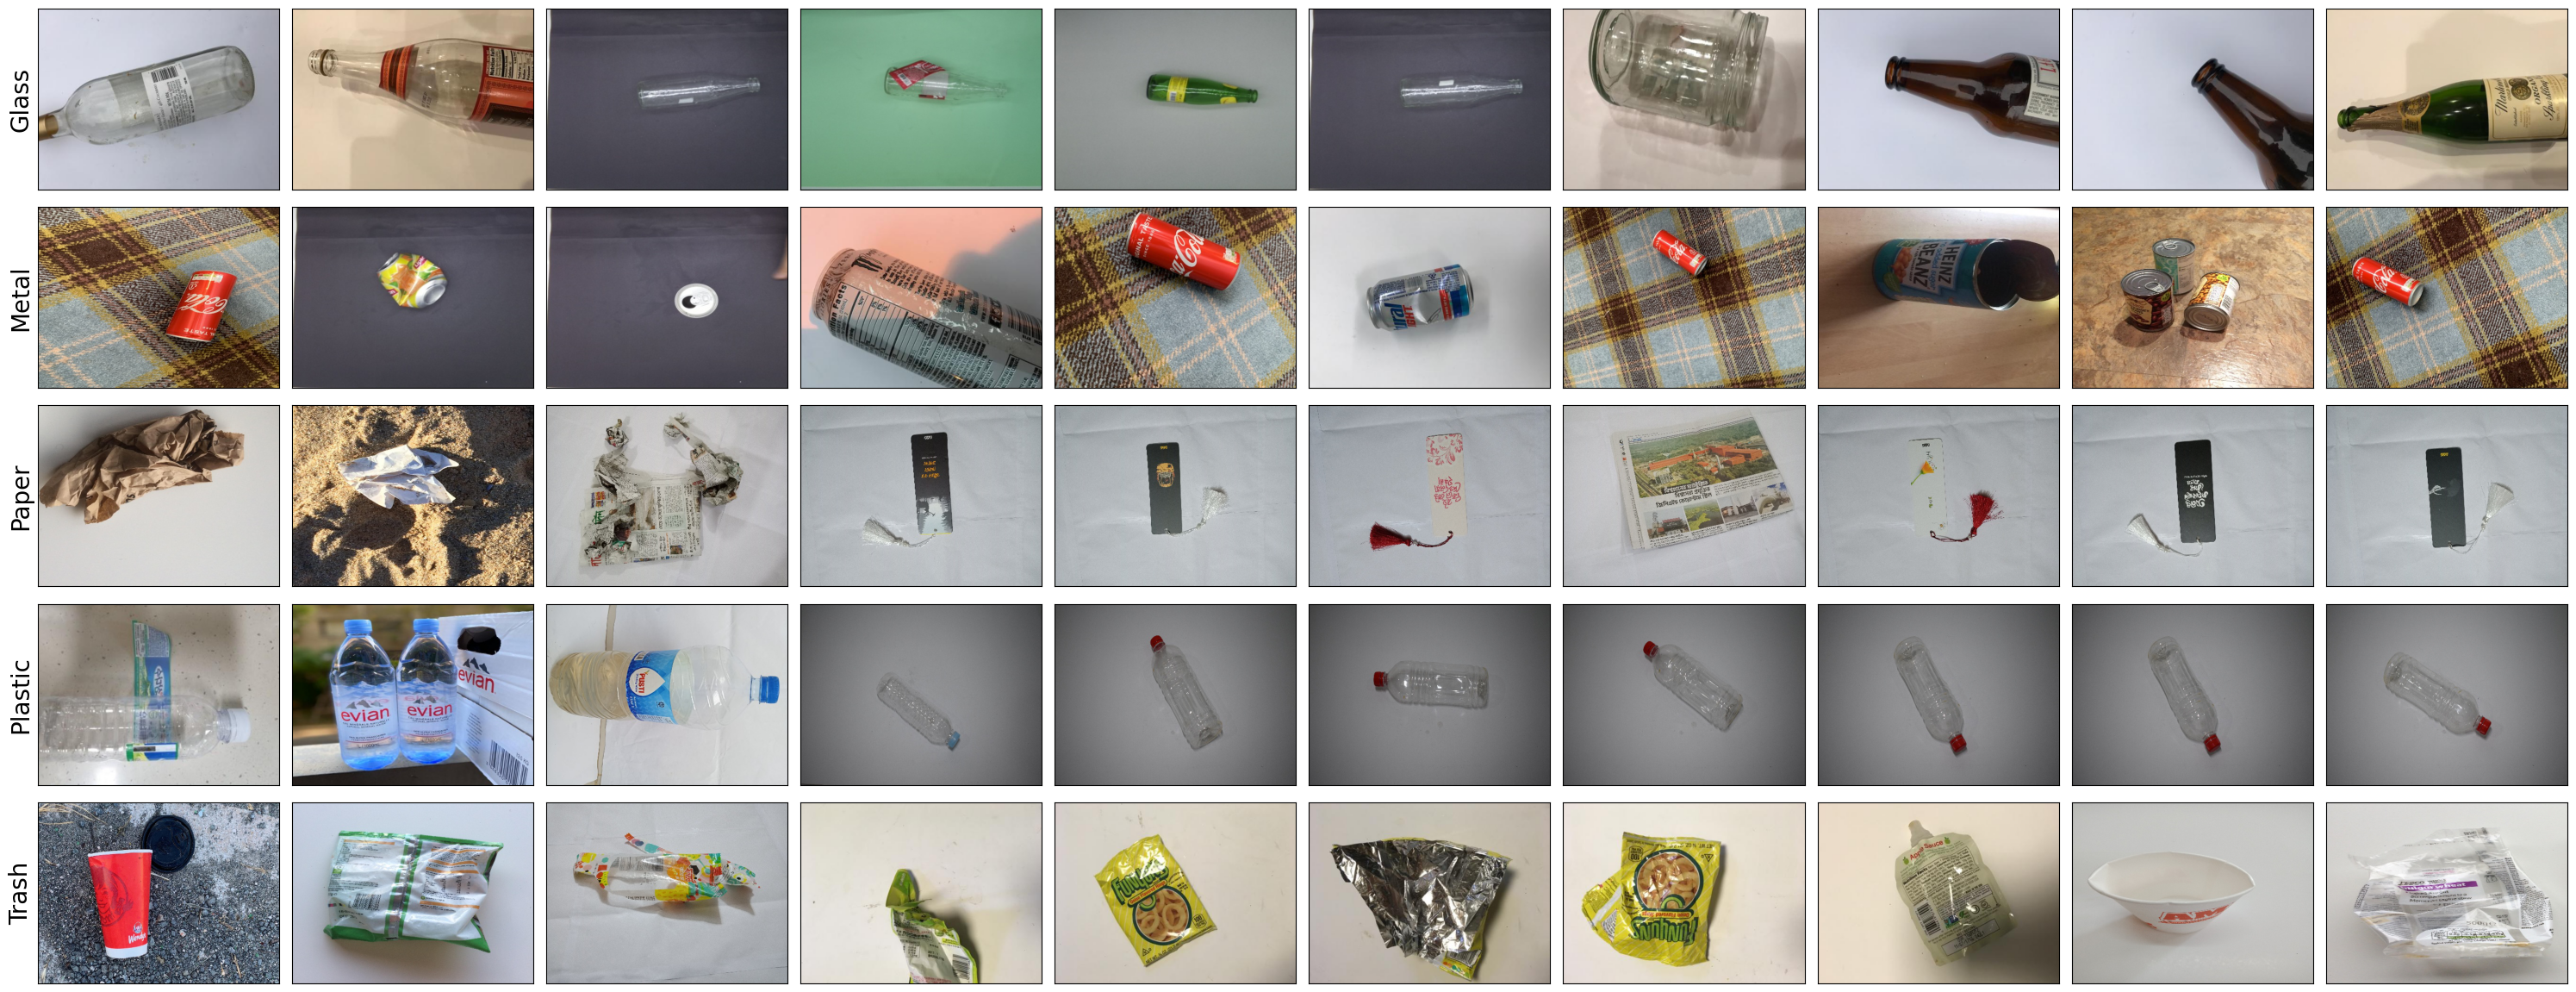

In [6]:
plt.figure(figsize=(30,14))

for i in range(5):
    directory = os.path.join(d, classes[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)

        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)

        if j == 0:
            plt.ylabel(classes[i], fontsize=20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(5,kernel_regularizer=l2(0.01), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 382, 510, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 380, 508, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 380, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 254, 32)     0         
 )                                                               
                                                        

In [8]:
model.compile(loss='squared_hinge', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255.,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(d, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(d, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2218 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


In [12]:
history = model.fit(train_generator, epochs=60, verbose=1, validation_data=validation_generator)

Epoch 1/60
70/70 [==============================] - 189s 3s/step - loss: 0.7364 - accuracy: 0.1628 - val_loss: 0.6221 - val_accuracy: 0.0924
Epoch 2/60
70/70 [==============================] - 167s 2s/step - loss: 0.6240 - accuracy: 0.1781 - val_loss: 0.5904 - val_accuracy: 0.0924
Epoch 3/60
70/70 [==============================] - 169s 2s/step - loss: 0.5899 - accuracy: 0.1637 - val_loss: 0.5700 - val_accuracy: 0.0924
Epoch 4/60
70/70 [==============================] - 163s 2s/step - loss: 0.5716 - accuracy: 0.1632 - val_loss: 0.5611 - val_accuracy: 0.2409
Epoch 5/60
70/70 [==============================] - 176s 3s/step - loss: 0.5610 - accuracy: 0.1727 - val_loss: 0.5564 - val_accuracy: 0.2065
Epoch 6/60
70/70 [==============================] - 166s 2s/step - loss: 0.5568 - accuracy: 0.1727 - val_loss: 0.5545 - val_accuracy: 0.1775
Epoch 7/60
70/70 [==============================] - 177s 3s/step - loss: 0.5550 - accuracy: 0.1677 - val_loss: 0.5532 - val_accuracy: 0.0036
Epoch 8/60
70

# Accuracy

In [14]:
score1= model.evaluate(validation_generator, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5520833134651184
Test accuracy: 0.21557970345020294


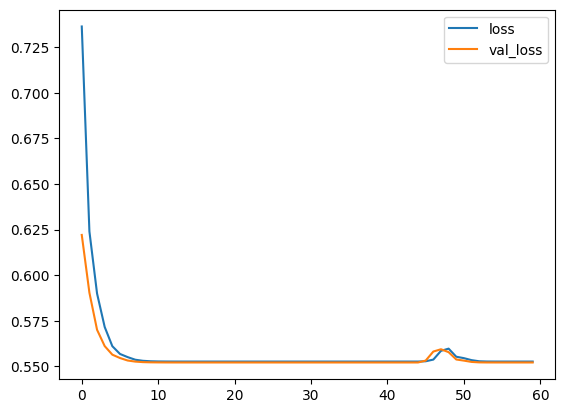

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

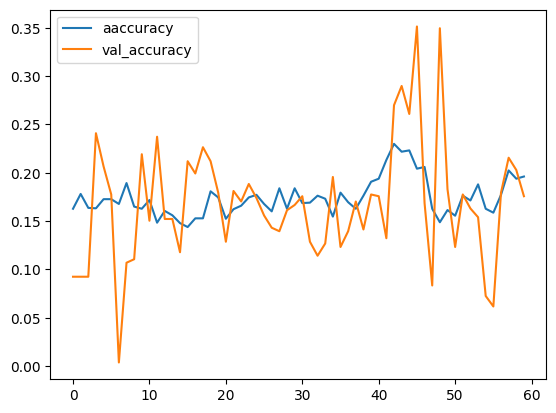

In [16]:
plt.plot(history.history['accuracy'], label='aaccuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Save Model

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("SVM_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("SVM_model.h5")

# Load Model

In [ ]:
# from keras.models import model_from_json

# # load json and create model
# json_file = open('SVM_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model2 = model_from_json(loaded_model_json)
# # load weights into new model
# model2.load_weights("SVM_model.h5")

# Save Model in Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !ls "/content/gdrive/My Drive"

In [17]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/SVM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/SVM_model.h5")

In [ ]:
# !ls "/content/gdrive/My Drive/Colab Notebooks"